In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

# Load dataset
df = pd.read_csv("E-commerce Dataset.csv")

In [10]:
# Convert date and time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


In [11]:
# Drop missing important values
df.dropna(subset=['Sales', 'Quantity', 'Product', 'Customer_Id'], inplace=True)


In [12]:
# Set style
sns.set(style="whitegrid")


In [13]:
# Create 2x2 dashboard layout
plt.figure(figsize=(16, 12))


<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

/tmp/ipython-input-14-1871876854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_d")


Text(0, 0.5, 'Product')

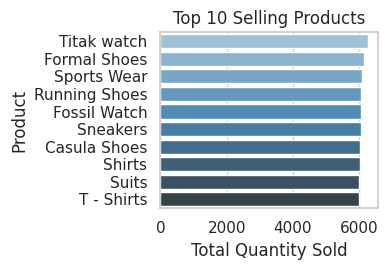

In [14]:
# 1. Top 10 Selling Products
plt.subplot(2, 2, 1)
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_d")
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")

([<matplotlib.axis.XTick at 0x7b519ceb4750>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

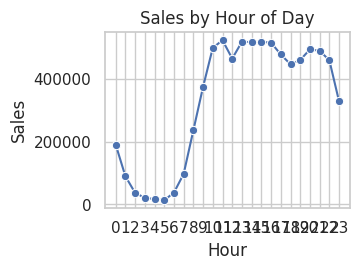

In [15]:
# 2. Sales by Hour
plt.subplot(2, 2, 2)
hourly_sales = df.groupby('Hour')['Sales'].sum()
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o")
plt.title("Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.xticks(range(0, 24))

Text(0.5, 1.0, 'Revenue by Product Category')

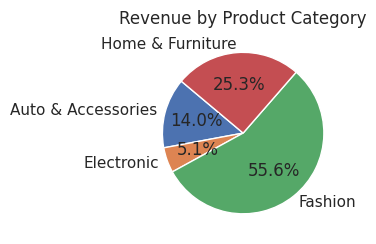

In [16]:
# 3. Revenue by Product Category
plt.subplot(2, 2, 3)
category_sales = df.groupby('Product_Category')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue by Product Category")


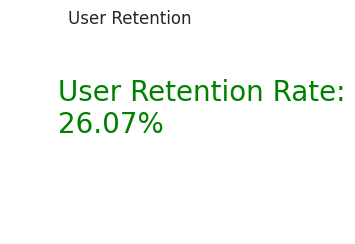

In [17]:
# 4. User Retention Rate
plt.subplot(2, 2, 4)
repeat_customers = df['Customer_Id'].value_counts()
retention_rate = (repeat_customers > 1).sum() / len(repeat_customers)
plt.axis('off')
plt.text(0.2, 0.5, f"User Retention Rate:\n{retention_rate:.2%}", fontsize=20, color='green')
plt.title("User Retention")

# Show all plots
plt.tight_layout()
plt.show()